In [1]:
import pandas as pd
# Plotly is a graphing library that allows you to make interactive graphs.
import numpy as np

# Generating the visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [21]:
def read_data():
    try:
        class1 = pd.read_csv(
                r"C:\Users\User\Desktop\pro\data\bengin.csv"
            )
        class2 = pd.read_csv(
                r"C:\Users\User\Desktop\pro\data\malware.csv"
            ) 
        class1["Label"] = 0 
        class2["Label"] = 1
        df = pd.concat([class1, class2])
        df = df.sample(frac=1).reset_index(drop=True)
        return df  
        
    except Exception as e:
        raise Exception(f"Exception occured while reading data: {e}")

df = read_data()

In [3]:
df

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class,Label
0,144,3,4,65535,184,280,7,0,0,1,...,5.0,0.0,NoPacker,6.429525,4.701563,474312.0,3.967960,0.0,0.0,0
1,144,3,4,65535,184,224,7,0,0,1,...,3.0,0.0,NoPacker,6.580999,6.035592,208384.0,6.894490,0.0,1.0,1
2,144,3,4,65535,184,216,4,0,1,1,...,4.0,1.0,Armadillov171,6.354921,4.972572,413696.0,7.673222,0.0,1.0,1
3,144,3,4,65535,184,128,11,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,144,3,4,65535,184,216,4,0,1,1,...,4.0,0.0,NoPacker,6.483168,3.163304,417792.0,7.772853,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,144,3,4,65535,184,128,5,0,1,1,...,4.0,0.0,NoPacker,6.171302,4.529145,21504.0,5.925745,0.0,0.0,0
1212,144,3,4,65535,184,128,11,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1213,144,3,4,65535,184,128,11,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1214,144,3,4,65535,184,224,6,0,0,1,...,3.0,0.0,NoPacker,7.943663,5.445516,169472.0,7.816545,0.0,1.0,1


In [33]:
df.shape

(1216, 71)

   e_cblp  e_cp  e_cparhdr  e_maxalloc  e_sp  e_lfanew  NumberOfSections  \
0     144     3          4       65535   184       128                11   
1     144     3          4       65535   184       240                 5   
2     144     3          4       65535   184       128                11   
3     144     3          4       65535   184       128                 9   
4     144     3          4       65535   184       256                 5   

   CreationYear  FH_char0  FH_char1  ...  non_sus_sections  packer  \
0             0         1         1  ...               NaN     NaN   
1             0         0         1  ...               4.0     0.0   
2             0         1         1  ...               NaN     NaN   
3             0         1         1  ...               NaN     NaN   
4             0         0         1  ...               4.0     0.0   

   packer_type    E_text    E_data  filesize    E_file  fileinfo  class  Label  
0          NaN       NaN       NaN       

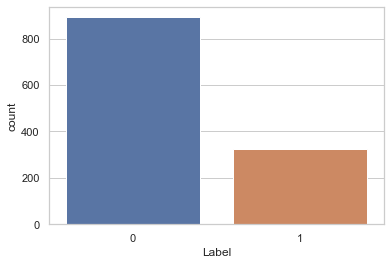

In [36]:
def do_basic_data_exploration(): 
    # do basic data exploration
    print(df.head())
    print("-----------------------------------------------------------------------------------") 
    print(df.info()) 
    print("-----------------------------------------------------------------------------------") 
    print(df.describe())
    print("-----------------------------------------------------------------------------------")
    print("Shape of the data", df.shape) 
    print("-----------------------------------------------------------------------------------")  
    print("Null values in the data", df.isnull().sum().sum())  
    print("-----------------------------------------------------------------------------------")

    # do data visualization
    sns.set(style="whitegrid")
    sns.countplot(x="Label", data=df)
    plt.show()

do_basic_data_exploration()

In [ ]:
def check_missing_values(train):   
    # fill missing values
    stats = []
    for col in train.columns:
        stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
        
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    stats_df.sort_values('Percentage of missing values', ascending=False) 
    return stats_df 
stats_df = check_missing_values(df) 
stats_df 



In [ ]:
# print all the columns from stats_df with missing percentage greater than 0# %% **************************************************************************
stats_df[stats_df['Percentage of missing values'] > 0] 
stats_df[stats_df['Percentage of missing values'] > 0].sort_values('Percentage of missing values', ascending=False) 


cols_that_have_missing_values = stats_df[stats_df['Percentage of missing values'] > 0]['Feature'].tolist() 
cols_that_have_missing_values

In [ ]:
df.drop("class", axis=1, inplace=True)

In [ ]:
def plot_distplot(train, col, bins=10): 
    fig = px.histogram(train, x=col, nbins=bins)
    fig.update_layout(title=f"Distribution of {col}")
    py.iplot(fig)

plot_distplot(df, 'e_maxalloc')

In [ ]:
def plot_correlation_matrix(train): 
    corr = train.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    plt.show() 

plot_correlation_matrix(df) 

# take out the highly correlated features 
def remove_highly_correlated_features(train, threshold=0.9):
    corr_matrix = train.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop
    

In [34]:
df.columns

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO